In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset=pd.read_csv("House_Rent_Dataset.csv")

In [8]:
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [9]:
dataset["BHK"].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

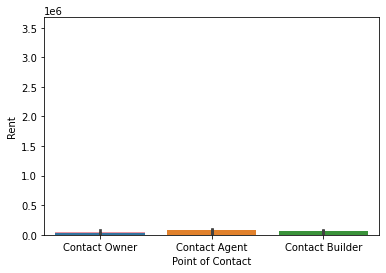

In [11]:
dataset.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


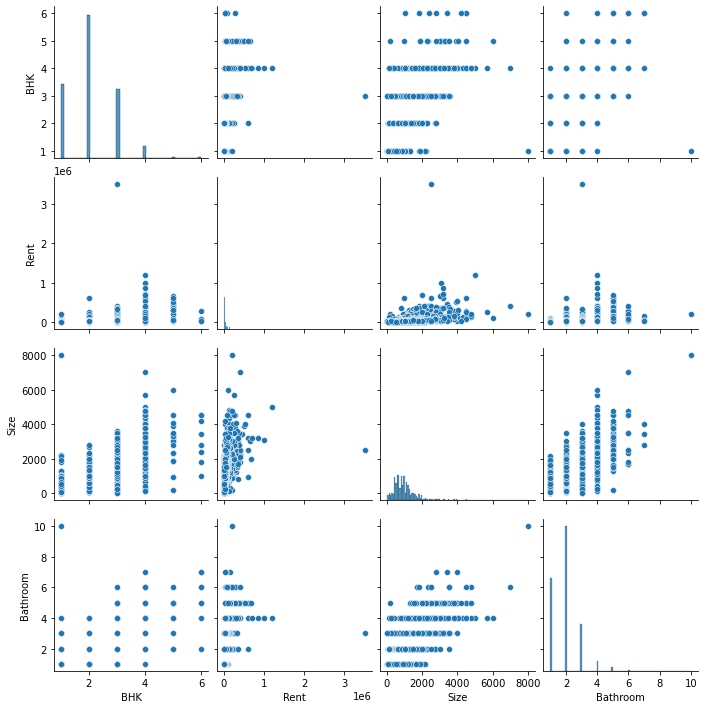

In [12]:
sns.pairplot(dataset)

In [13]:
dataset.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [14]:
cat_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
print(cat_features)

['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


In [15]:
for feature in cat_features:
    print("{} has {} categories".format(feature,len(dataset[feature].unique())))

Posted On has 81 categories
Floor has 480 categories
Area Type has 3 categories
Area Locality has 2235 categories
City has 6 categories
Furnishing Status has 3 categories
Tenant Preferred has 3 categories
Point of Contact has 3 categories


In [16]:
dummy_feature=[]
for feature in cat_features:
    if len(dataset[feature].unique()) < 10:
        dummy_feature.append(feature)
print(dummy_feature)

['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


In [17]:
Area_Type=pd.get_dummies(dataset["Area Type"],drop_first=True)
City=pd.get_dummies(dataset["City"],drop_first=True)
Furnishing_Status=pd.get_dummies(dataset["Furnishing Status"],drop_first=True)
Tenant_Preferred=pd.get_dummies(dataset["Tenant Preferred"],drop_first=True)
Point_of_Contact=pd.get_dummies(dataset["Point of Contact"],drop_first=True)

In [18]:
dummy_data=pd.concat([Area_Type,City,Furnishing_Status,Tenant_Preferred,Point_of_Contact],axis=1)

In [19]:
dummy_data

,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Builder,Contact Owner
0,0,1,0,0,0,1,0,0,1,1,0,0,1
1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1,1,0,0,1
4,1,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1,0,0,0,1,0,0,1,0,1,0,0,1
4742,0,1,0,0,1,0,0,1,0,1,0,0,1
4743,1,0,0,0,1,0,0,1,0,1,0,0,0
4744,1,0,0,0,1,0,0,1,0,0,1,0,0


In [20]:
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [21]:
numerical=pd.concat([dataset["BHK"],dataset["Size"],dataset["Bathroom"]],axis=1)
numerical.head()

,BHK,Size,Bathroom
0,2,1100,2
1,2,800,1
2,2,1000,1
3,2,800,1
4,2,850,1


In [22]:
temp_data=[feature for feature in dataset.columns
    if feature not in numerical.columns 
         if len(dataset[feature].unique()) > 10 and feature != "Rent" ]

In [23]:
print(temp_data)

['Posted On', 'Floor', 'Area Locality']


In [24]:
g=0
l=0
for i in dataset["Posted On"]:
    if int(i[0:4]) >21:
        g+=1
    else:
        l+=1
print(g,l)

4746 0


{'whiskers': [<matplotlib.lines.Line2D at 0x17362734df0>,
 'caps': [<matplotlib.lines.Line2D at 0x17362746490>,
 'boxes': [<matplotlib.patches.PathPatch at 0x17362734a30>],
 'medians': [<matplotlib.lines.Line2D at 0x17362746970>],
 'fliers': [<matplotlib.lines.Line2D at 0x17362746c40>],
 'means': []}

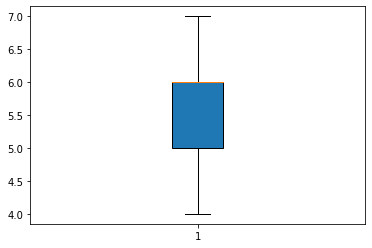

In [25]:
m=[int(dataset["Posted On"][i][5:7]) for i in range(4745)]
plt.boxplot(m,vert=True,patch_artist=True)

In [26]:
print(dataset["Floor"].unique())

['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5' '2 out of 2' '2 out of 5' '4 out of 14'
 '3 out of 3' '5 out of 5' '4 out of 4' '7 out of 8' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2' '2 out of 7'
 '4 out of 10' '7 out of 10' '2 out of 13' '6 out of 7' '4 out of 7'
 '14 out of 14' '43 out of 78' '2 out of 8' '13 out of 18' '5 out of 12'
 '18 out of 24' '3 out of 7' '17 out of 31' '11 out of 21' '7 out of 19'
 '14 out of 23' '9 out of 20' 'Upper Basement out of 9' '19 out of 24'
 '3 out of 21' '1 out of 22' '8 out of 8' '6 out of 12' '4 out of 58'
 'Upper Basement out of 16' '60 out of 66' '34 out of 48' '5 out of 8'
 '5 out of 14' '14 out of 40' '5 out of 7' '9 out of 22' '12 out of 18'
 '26 out of 44' '1 out of 8' 

In [27]:
f=[]
for i in range(4746):
    if dataset["Floor"][i][0:6] == "Ground":
        f.append(str(9) + dataset["Floor"][i][14:])
    elif dataset["Floor"][i][0:5] == "Upper":
        f.append(str(8) + dataset["Floor"][i][22:])
    elif dataset["Floor"][i][0:5] == "Lower":
        f.append(str(7) + dataset["Floor"][i][22:])
    elif dataset["Floor"][i][1:2] == " ":
        f.append(dataset["Floor"][i][0] + dataset["Floor"][i][9:])
    else:
        f.append(dataset["Floor"][i][0:2] + dataset["Floor"][i][10:])
f

['92',
 '13',
 '13',
 '12',
 '12',
 '91',
 '94',
 '12',
 '12',
 '13',
 '14',
 '11',
 '14',
 '12',
 '92',
 '11',
 '12',
 '92',
 '93',
 '12',
 '12',
 '23',
 '94',
 '92',
 '12',
 '11',
 '11',
 '93',
 '45',
 '92',
 '92',
 '92',
 '11',
 '92',
 '23',
 '12',
 '22',
 '93',
 '12',
 '12',
 '91',
 '92',
 '25',
 '414',
 '93',
 '91',
 '33',
 '91',
 '92',
 '93',
 '11',
 '22',
 '91',
 '92',
 '55',
 '92',
 '11',
 '22',
 '93',
 '44',
 '13',
 '92',
 '78',
 '13',
 '94',
 '93',
 '92',
 '92',
 '92',
 '13',
 '92',
 '14',
 '12',
 '92',
 '92',
 '14',
 '92',
 '24',
 '92',
 '12',
 '92',
 '13',
 '93',
 '11',
 '12',
 '23',
 '92',
 '44',
 '13',
 '23',
 '94',
 '92',
 '24',
 '91',
 '12',
 '12',
 '13',
 '34',
 '12',
 '12',
 '92',
 '15',
 '91',
 '22',
 '91',
 '85',
 '92',
 '92',
 '91',
 '92',
 '13',
 '91',
 '12',
 '91',
 '13',
 '13',
 '23',
 '92',
 '22',
 '14',
 '11',
 '12',
 '12',
 '11',
 '96',
 '11',
 '91',
 '11',
 '22',
 '91',
 '12',
 '91',
 '13',
 '12',
 '33',
 '92',
 '13',
 '92',
 '91',
 '11',
 '13',
 '24',
 '91'

In [28]:
j=0
for i in f:
    j+=1
print(j)

4746


In [29]:
ff=[]
for i in f:
    ff.append(int(i))
print(ff)

[92, 13, 13, 12, 12, 91, 94, 12, 12, 13, 14, 11, 14, 12, 92, 11, 12, 92, 93, 12, 12, 23, 94, 92, 12, 11, 11, 93, 45, 92, 92, 92, 11, 92, 23, 12, 22, 93, 12, 12, 91, 92, 25, 414, 93, 91, 33, 91, 92, 93, 11, 22, 91, 92, 55, 92, 11, 22, 93, 44, 13, 92, 78, 13, 94, 93, 92, 92, 92, 13, 92, 14, 12, 92, 92, 14, 92, 24, 92, 12, 92, 13, 93, 11, 12, 23, 92, 44, 13, 23, 94, 92, 24, 91, 12, 12, 13, 34, 12, 12, 92, 15, 91, 22, 91, 85, 92, 92, 91, 92, 13, 91, 12, 91, 13, 13, 23, 92, 22, 14, 11, 12, 12, 11, 96, 11, 91, 11, 22, 91, 12, 91, 13, 12, 33, 92, 13, 92, 91, 11, 13, 24, 91, 44, 92, 13, 23, 94, 13, 92, 92, 12, 92, 92, 92, 12, 93, 93, 14, 12, 12, 21, 93, 12, 23, 93, 93, 93, 22, 12, 92, 92, 94, 24, 12, 12, 92, 12, 22, 92, 92, 25, 11, 23, 11, 92, 93, 24, 23, 91, 92, 92, 22, 13, 92, 12, 24, 12, 91, 11, 93, 12, 92, 12, 93, 22, 13, 11, 91, 13, 12, 22, 91, 91, 91, 92, 12, 11, 91, 91, 12, 23, 12, 11, 92, 91, 45, 92, 91, 12, 94, 91, 91, 93, 92, 92, 13, 93, 92, 12, 91, 91, 23, 12, 13, 12, 22, 24, 12, 13

In [30]:
train_data=pd.concat([pd.DataFrame(dummy_data),pd.DataFrame(numerical),pd.DataFrame(m),pd.DataFrame(ff)],axis=1)

In [45]:
train_data.head()

,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Builder,Contact Owner,BHK,Size,Bathroom,0,0
0,0,1,0,0,0,1,0,0,1,1,0,0,1,2,1100,2,5.0,92
1,0,1,0,0,0,1,0,1,0,1,0,0,1,2,800,1,5.0,13
2,0,1,0,0,0,1,0,1,0,1,0,0,1,2,1000,1,5.0,13
3,0,1,0,0,0,1,0,0,1,1,0,0,1,2,800,1,7.0,12
4,1,0,0,0,0,1,0,0,1,0,0,0,1,2,850,1,5.0,12


In [46]:
y=dataset["Rent"]
y.to_csv("y_train.csv")
train_data.to_csv("x_train.csv")


In [47]:

print(y)

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.3, random_state=42)

In [49]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(3322, 18)
(3322,)
(1424, 18)
(1424,)
